Team 12  
Authors: Lam Kwun Yuk, Sha Yu Hin  
IDs: 20512073, 20516835  

In [61]:
import numpy as np
import os
import pickle as pkl
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.utils import to_categorical
from collections import Counter, defaultdict
from matplotlib import pyplot as plt

In [2]:
train_dict = pkl.load(open("data/train.pkl", "rb"))
val_dict = pkl.load(open("data/val.pkl", "rb"))
test_dict = pkl.load(open("data/test.pkl", "rb"))
print("keys in train_dict:", train_dict.keys())
print("keys in val_dict:", val_dict.keys())
print("keys in test_dict:", test_dict.keys())

keys in train_dict: dict_keys(['id', 'word_seq', 'tag_seq'])
keys in val_dict: dict_keys(['id', 'word_seq', 'tag_seq'])
keys in test_dict: dict_keys(['id', 'word_seq'])


In [3]:
vocab_dict = {'_unk_': 0, '_w_pad_': 1}

for doc in train_dict['word_seq']:
    for word in doc:
        if(word not in vocab_dict):
            vocab_dict[word] = len(vocab_dict)

tag_dict = {'_t_pad_': 0} # add a padding token

for tag_seq in train_dict['tag_seq']:
    for tag in tag_seq:
        if(tag not in tag_dict):
            tag_dict[tag] = len(tag_dict)
word2idx = vocab_dict
idx2word = {v:k for k,v in word2idx.items()}
tag2idx = tag_dict
idx2tag = {v:k for k,v in tag2idx.items()}            

print("size of word vocab:", len(vocab_dict), "size of tag_dict:", len(tag_dict))

size of word vocab: 82275 size of tag_dict: 65


In [4]:
counter = Counter()
for l in train_dict["tag_seq"]:
    counter.update(l)

The percentage of occurence of type 'O':

In [5]:
counter.most_common()[0][1]/sum(c[1] for c in counter.most_common())

0.6987533103813559

The 20 most frequent types besides 'O' and '\_w_pad\_'

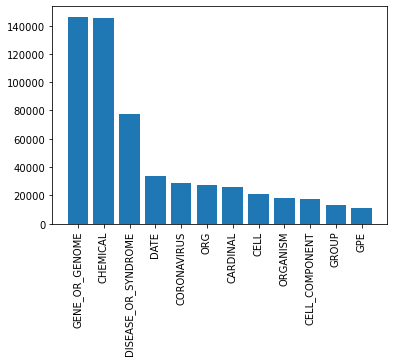

In [20]:
tp, oc = tuple(zip(*counter.most_common()[2:14]))
plt.bar(tp, oc)
plt.xticks(rotation = 90)
plt.show()

Find the words that are labelled other than 'O' for at least once

In [41]:
tr_s = [[t.lower() for t in ts] for ts in train_dict['word_seq']]
vocab_dict_2 = {'_unk_': 0, '_w_pad_': 1}

for doc in tr_s:
    for word in doc:
        if(word not in vocab_dict_2):
            vocab_dict_2[word] = len(vocab_dict_2)

In [43]:
len(vocab_dict_2)

67255

In [44]:
d = defaultdict(set)
for ws, ts in zip(tr_s, train_dict["tag_seq"]):
    for w, t in zip(ws, ts):
        if t != 'O':
            d[w].add(t)
for ws, ts in zip(tr_s, train_dict["tag_seq"]):
    for w, t in zip(ws, ts):
        if w in d and t == 'O':
            d[w].add(t)

In [46]:
len(d)

38275

In [48]:
d_co = {k: len(v) for k, v in d.items()}

In [55]:
d_co['and']

29

# Intersection of stopwords and multi-tagged word

In [62]:
nltk.download('stopwords')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shark\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
stop_d = stopwords.intersection(d)

In [74]:
d3 = Counter()
for k, v in d_co.items():
    if k in stop_d:
        d3[k] = v 

In [78]:
d3.most_common()

[('and', 29),
 ('of', 26),
 ('the', 19),
 ('to', 14),
 ('s', 14),
 ('m', 13),
 ('a', 12),
 ('in', 11),
 ('for', 11),
 ('y', 11),
 ('t', 10),
 ('i', 10),
 ('or', 10),
 ('d', 9),
 ('at', 9),
 ('as', 9),
 ('with', 8),
 ('between', 8),
 ('an', 8),
 ('on', 8),
 ('than', 7),
 ('by', 7),
 ('up', 7),
 ('over', 7),
 ('more', 6),
 ('this', 6),
 ('o', 6),
 ('each', 5),
 ('about', 5),
 ('that', 5),
 ('from', 5),
 ('her', 5),
 ('against', 5),
 ('under', 4),
 ('into', 4),
 ('only', 4),
 ('few', 4),
 ('through', 4),
 ('just', 4),
 ('its', 4),
 ('don', 4),
 ('during', 4),
 ('no', 4),
 ('am', 4),
 ('is', 4),
 ('all', 3),
 ('down', 3),
 ('these', 3),
 ('ma', 3),
 ('were', 3),
 ('most', 3),
 ('some', 3),
 ('ve', 3),
 ('after', 3),
 ('above', 3),
 ('what', 3),
 ('other', 3),
 ('below', 3),
 ('out', 3),
 ('haven', 3),
 ('their', 2),
 ('now', 2),
 ('same', 2),
 ('those', 2),
 ('until', 2),
 ('before', 2),
 ('his', 2),
 ('having', 2),
 ('both', 2),
 ('our', 2),
 ('while', 2),
 ('very', 2),
 ('are', 2),
 ('we

In [80]:
d['korea']

{'ANATOMICAL_STRUCTURE',
 'CELL',
 'CELL_COMPONENT',
 'CHEMICAL',
 'DISEASE_OR_SYNDROME',
 'EVENT',
 'GENE_OR_GENOME',
 'GPE',
 'O',
 'ORG',
 'ORGANISM',
 'PERSON'}